<a href="https://colab.research.google.com/github/luckjp/AnalisisCuantitativoAvanzado/blob/main/Clase_1_Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Cuantitativo avanzado**
# **Clase 1: Regresión lineal**
# *Lic. Lucio José Pantazis*

## Motivación

La siguiente base "home_sales_nyc.csv" describe datos sobre ventas inmobiliarias en la ciudad de Nueva York (disponible en https://github.com/DataScienceForPublicPolicy/diys/tree/main/data )

In [ ]:
# Importo la librería necesaria 
import pandas as pd
# El link a la base de datos como string
url = 'https://raw.githubusercontent.com/DataScienceForPublicPolicy/diys/main/data/home_sales_nyc.csv'
# Se usa la librería pandas para leer el .csv
df = pd.read_csv(url)

Para verificar que la base está bien cargada, visualizamos las primeras 5 filas de la misma:

In [ ]:
df.head()

,time.index,borough,neighborhood,building.class.category,zip.code,residential.units,commercial.units,total.units,land.square.feet,gross.square.feet,year.built,sale.price,sale.date,sale.year,age
0,14,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,2500,1474,1901,241500.0,2018-08-17,2018,117
1,162,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,1578,1470,1899,180000.0,2018-03-22,2018,119
2,298,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,1694,1497,1899,246000.0,2017-11-06,2017,118
3,179,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,1694,1497,1899,255000.0,2018-03-05,2018,119
4,336,2,BATHGATE,01 ONE FAMILY DWELLINGS,10457,1,0,1,3525,1340,1899,380250.0,2017-09-29,2017,118


Por limitaciones en lo que se puede exponer, no se ven todas las columnas, por lo que se muestran sólo algunas variables y las columnas intermedias se marcan con puntos suspensivos.

Sin embargo, la última línea especifica que la base tiene 15 variables, por más que no se dispongan en el output. Por otro lado, las 5 filas que se mencionan no son las totales de la base de datos, son sólo las que se muestran.

La primer columna no se corresponde con ninguna variable y hace referencia al índice, utilizado para recorrer las distintas filas.

Para seguir analizando la base, vamos a apelar al método .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12668 entries, 0 to 12667
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time.index               12668 non-null  int64  
 1   borough                  12668 non-null  int64  
 2   neighborhood             12668 non-null  object 
 3   building.class.category  12668 non-null  object 
 4   zip.code                 12668 non-null  int64  
 5   residential.units        12668 non-null  int64  
 6   commercial.units         12668 non-null  int64  
 7   total.units              12668 non-null  int64  
 8   land.square.feet         12668 non-null  int64  
 9   gross.square.feet        12668 non-null  int64  
 10  year.built               12668 non-null  int64  
 11  sale.price               12668 non-null  float64
 12  sale.date                12668 non-null  object 
 13  sale.year                12668 non-null  int64  
 14  age                   

En este output, se ve que la base tiene 12668 filas y se visualizan 3 tipos de datos:

* object: variables categóricas o cualitativas

* int: variables numéricas de valor entero

* float: variables numéricas

Haremos foco ahora en las siguientes variables:
 
* gross.square.feet: superficie del inmueble (cuantitativa)

* sale.price: precio de venta (cuantitativa)

Se puede pensar que estas variables están vinculadas, ya que intuitivamente, a medida que los inmuebles son más grandes, más precio de venta tendrán.

## Gráfico exploratorio

Para analizar esta dependencia, hacemos un gráfico de dispersión ("scatterplot" en inglés), donde cada inmueble se corresponde con un punto en el gráfico, cuya coordenada horizontal es la superficie, y la coordenada vertical es el precio de venta.

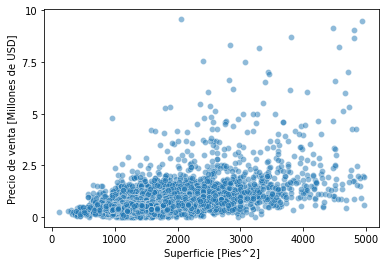

In [ ]:
# Cargo los paquetes necesarios
import matplotlib.pyplot as plt
import seaborn as sns
# Creo un scatterplot que considere la base de datos df como parámetro
# fijando la coordenada x como la superficie y la coordenada y como el precio de venta
sns.scatterplot(data=df,x="gross.square.feet",y="sale.price",alpha=0.5)
# Al gráfico g se le agregan nombres adecuados para los ejes
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
# Este comando obliga a Python a mostrar el gráfico
plt.show()

Sin embargo, surgen las siguientes preguntas:

* ¿Cómo es ese crecimiento?

* En base a estos datos, ¿Hay una forma de estimar el precio de venta de un inmueble sabiendo su superficie? 

## Regresión lineal

### Modelos de regresión


En estadística, cuando se busca vincular los valores de una variable (por ahora, **cuantitativa**) de interés a partir de otra/s, se aplica un "modelo de regresión"

En este caso, se busca explicar el precio de venta de un inmueble en función de su superficie. 

* La variable de interés principal (en este caso) es el precio del inmueble. En los modelos de regresión esta variable se denomina variable de respuesta o variable dependiente. Suele ser notada con la letra $Y$.

* Para explicar los precios, se utiliza (en este caso) la variable de superficie. Generalmente estas variables se denominan covariables, variables explicativas, variables predictivas o variables independientes. Suelen ser notadas con la letra $X$

### Regresión lineal simple

El modelo más simple de regresión se llama el modelo de regresión *lineal* simple. Según indica su nombre, este modelo asume que las variables 
* $Y$: variable de respuesta
* $X$: variable explicativa 

se disponen alrededor de una *recta*:
$$Y\approx a+b\cdot X$$
donde $a$ representa la *ordenada* (en inglés, "intercept") y $b$ representa la *pendiente* (en inglés, "slope").

En términos de nuestro ejemplo, vamos a cambiar la notación usual y considerar:
* $\text{P}_i$: Precio de cada inmueble (Variable de respuesta, denominada `'sale.price'` en la base de datos)
* $\text{S}_i$: Superficie de cada inmueble (Variable explicativa, denominada `'gross.square.feet'` en la base de datos)

El índice $i$ permite individualizar e identificar cada inmueble de la base.

Es decir, plantear un modelo de regresión lineal simple en este contexto
sería equivalente a plantear que existen dos valores $a$ y $b$ de forma que para cada inmueble $i$ se cumple:
$$\text{P}_i\approx a+b\cdot {S}_i $$

Comentarios:

* El signo "$\approx$" simboliza una aproximación. Esto se debe a que el precio no tiene porqué obedecer **exactamente** la ecuación.

* Del mismo modo, el modelo no tiene porqué ser válido. Es una estructura en los datos propuesta por el analista, que tiene que contrastarse con los datos para evaluar su validez.

### Estimación de $a$ y $b$

Hasta ahora, el modelo plantea que existen dichas constantes $a$ y $b$, pero no dice como se calculan.

La estimación busca que para cada inmueble $i$, la distancia entre el precio y la aproximación sea lo más pequeño posible. Como la distancia debe ser positiva, se utiliza el cuadrado de la diferencia. Es decir, se busca minimizar:
$$(\text{P}_i- a-b\cdot {S}_i)^2 $$

Sin embargo, como el modelo se busca a aplicar a **todos** los inmbuebles, puede suceder que la elección de $a$ y $b$ que minimiza la distancia para un inmueble puede generar una distancia máxima en otro. 

Por lo tanto, se buscan los valores de $a$ y $b$ que minimizan la **suma** sobre todos los inmuebles de todas estas diferencias al cuadrado. Los valores **óptimos** se denominan "estimadores de mínimos cuadrados" y suelen notarse con un acento circunflejo: $\widehat{a}$ y $\widehat{b}$.

### Estimación en python

Para obtener estos valores en Python, se puede usar el paquete sklearn

In [ ]:
# Importo el paquete necesario
from sklearn.linear_model import LinearRegression
# covs representa la covariable (superficie)
covs=["gross.square.feet"];X=df[covs].copy()
# resp representa la variable de respuesta (precio)
resp=["sale.price"];y=df[resp].copy()
# Se inicializa la regresión
mod=LinearRegression()
# Se buscan los valores óptimos de a y b para los datos de la base
mod.fit(X,y)
# El valor óptimo de a se obtiene con "intercept_" y el de b con ".coef_".
# Como se devuelven listas, se convierten a variables numéricas con "float"
print([float(mod.intercept_),float(mod.coef_)])

[-42584.3889365294, 466.1762765519364]


Esto significa que según este modelo, para un inmbueble de, por ejemplo, 2000 pies cuadrados, se estima un precio de venta de:
$$-42584.3889365294+466.1762765519364\cdot 2000=889768.1641673434 $$

En código de Python, sería del siguiente modo:

In [ ]:
print(float(mod.intercept_)+float(mod.coef_)*2000)

889768.1641673434


### Interpretación de los coeficientes

AGREGAR


### Capacidades explicativas y predictivas

La anterior estimación nos permite pensar en dos aspectos del modelo:

* Capacidad explicativa: Por más que hayamos encontrado valores óptimos de $a$ y $b$ para los datos obtenidos, ¿es esa relación lineal entre ambas variables representativa de lo observado? Es decir, ¿el modelo **explica** la relación entre los datos **observados** las variables?

* Capacidad predictiva: Más allá de si los datos quedan bien explicados, en el caso de incluirse un **nuevo** inmueble, ¿es buena la estimación obtenida a través de los coeficientes $a$ y $b$? Es decir, ¿permite el modelo **predecir** el precio de venta de **nuevos** inmuebles?

### Predicción en Python

 Para predecir en Python, una vez obtenidos los coeficientes $a$ y $b$, se utiliza el método predict. Como parámetro, conviene introducir una base de datos con el mismo nombre de la variable predictiva que se utilizó en la estimación (en este caso, `"gross.square.feet"`):

In [ ]:
# Valor NUEVO de superficie utilizado para estimar su precio de venta
X_pred=pd.DataFrame({"gross.square.feet":[2000]})
# Precio de venta estimado para un inmueble de dicha superficie
y_pred=mod.predict(X_pred)
print(float(y_pred))

889768.1641673434


Vemos que coincide el valor obtenido anteriormente

In [ ]:
print(float(mod.intercept_)+float(mod.coef_)*2000)

889768.1641673434


Del mismo modo, se pueden predecir precios de venta para varios inmuebles:

In [ ]:
# Valores nuevos de superficie utilizados para estimar su precio de venta
X_pred=pd.DataFrame({"gross.square.feet":[1000,2000,3000,4000]})
# Precios de venta estimados para inmuebles de dichas superficies
y_pred=mod.predict(X_pred)
print([float(y) for y in y_pred])

[423591.887615407, 889768.1641673434, 1355944.4407192797, 1822120.7172712162]


Por lo tanto, en el gráfico inicial podemos agregar las estimaciones para ver cómo se adapta a los datos originales. Para evaluarlo gráficamente, por cada estimación se agrega un punto, cuya "coordenada x" es la superficie del inmueble (variable predictiva) y la "coordenada y" es la estimación de la variable de respuesta:

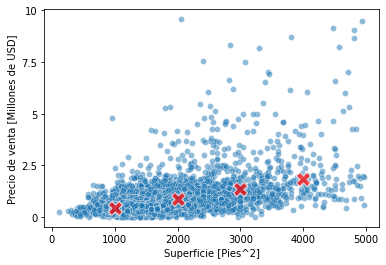

In [ ]:
# Creo una base de datos con predicciones, manteniendo los nombres de las variables originales 
# para superponer en el gráfico consistentemente.
df_pred=X_pred;df_pred["sale.price"]=y_pred
# Agrego los puntos de la base original
sns.scatterplot(data=df,x="gross.square.feet",y="sale.price",alpha=0.5)
# Agrego las predicciones
sns.scatterplot(data=df_pred,x="gross.square.feet",y="sale.price",alpha=0.7,color="red",marker="X", s=200)
# Corrijo los ejes
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

Para evaluar gráficamente el modelo, se puede unir con una línea dos valores predichos, tomando los mínimos y máximos de la superficie del inmueble como coordenada $x$ y tomando sus estimaciones como coordenada $y$.

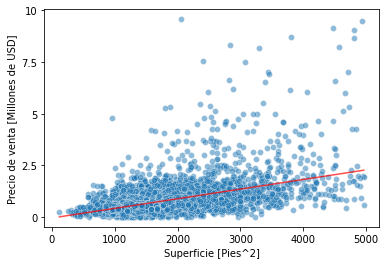

In [ ]:
# Calculo el mínimo y el máximo
minX=df['gross.square.feet'].min()
maxX=df['gross.square.feet'].max()
# Genero una nueva base con las predicciones
df_pred=pd.DataFrame({"gross.square.feet":[minX,maxX]})
df_pred["sale.price"]=mod.predict(df_pred)
# Uno ambas predicciones con una línea
sns.scatterplot(data=df,x="gross.square.feet",y="sale.price",alpha=0.5)
sns.lineplot(data=df_pred,x="gross.square.feet",y="sale.price",alpha=0.7,color="red")
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

### Evaluación del modelo

Ahora surge la pregunta: ¿Cómo podemos evaluar si este modelo es representativo de los datos? 

Un valor estándard para evaluar el rendimiento de un modelo, es la magnitud denominada $R^2$. Este valor evalúa las similitudes entre la variable independiente y las predicciones de la variable independiente. Sus valores van entre 0 y 1, y mientras más cercanos esté a 1, mejor es el modelo para representar los datos.

En Python, dicho valor se calcula utilizando el modelo con $a$ y $b$ ya estimados. Como ya se aplicó el método "fit", se puede calcular el $R^2$ con el método "score":

In [ ]:
mod.score(X,y)

0.2540788486552811

Vemos que el valor de $R^2$ no es tan alto, en el gráfico se ve que para algunos valores altos de la superficie, la recta queda lejos de algunos inmuebles con precios muy altos de venta.

## Modelo cuadrático

Como se dijo previamente, el modelo lineal no tiene porqué representar bien a los datos. Además, observando el crecimiento de los datos, pareciera que puede ser mejor representado por una parábola. Es decir, se puede plantear el siguiente modelo para cada inmueble $i$:
$$\text{P}_i\approx a+b\cdot {S}_i+c\cdot {S}^2_i $$

Ahora, deben encontrarse valores óptimos de $a$, $b$ y $c$ para los datos en cuestión. La idea es la misma que el modelo de la recta. Se utiliza el criterio de minimizar la suma de las distancias al cuadrado:
$$(\text{P}_i- a-b\cdot {S}_i-c\cdot {S}^2_i)^2 $$

### Modelo cuadrático en Python

Para calcular estos valores en Python, nos surge un inconveniente: la variable que tiene los valores de la superficie al cuadrado, no está presente en la base de datos. Sin embargo, podemos generarla fácilmente a partir de la variable de superficie. Llamaremos a esta nueva variable `"gross.square.feet.sq"` y podemos verificar que los valores de esta nueva variable coinciden con la original al cuadrado:

In [ ]:
df["gross.square.feet.sq"]=df["gross.square.feet"]**2
print(df[["gross.square.feet","gross.square.feet.sq"]].head())

   gross.square.feet  gross.square.feet.sq
0               1474               2172676
1               1470               2160900
2               1497               2241009
3               1497               2241009
4               1340               1795600


### Estimación de $a$, $b$ y $c$

Una vez que tenemos esta variable disponible, para estimar los valores de $a$, $b$ y $c$ usamos la misma estrategia que usamos para el modelo lineal. Sin embargo, hay algunas salvedades.

Ahora las variables explicativas son 2 (`"gross.square.feet"` y `"gross.square.feet.sq"`) y por lo tanto, el método `coef_` devuelve dos valores (uno para $b$ y el otro para $c$, mantienen el orden con el que fueron dados como input):

In [ ]:
# Las covariables son 2 y se guardan en la base X
covs=["gross.square.feet","gross.square.feet.sq"];X=df[covs].copy()
# La variable de respuesta se guarda en la variable y
resp=["sale.price"];y=df[resp].copy()
# Inicializo el modelo y calculo los valores de a, b y c
mod=LinearRegression();
mod.fit(X,y)
# Guardo la lista de coeficientes e imprimo sus valores
lis_coef=[[mod.intercept_],mod.coef_[0]]
print([float(c) for it in lis_coef for c in it])

[430404.7670243506, -68.91120967567545, 0.12843075623801678]


Entonces, para una superficie de 2000 pies cuadrados, se estima un valor de
$$430404.7670243506-68.91120967567545\cdot 2000 + 0.12843075623801678\cdot 2000^2=806305.372625 $$

Además, se puede ver que aumenta el $R^2$ de este modelo respecto del modelo anterior

In [ ]:
print(mod.score(X,y))

0.2807952363411663


## Gráfico modelo cuadrático

Además de aumentar el $R^2$, se puede ver gráficamente que las predicciones se ajustan más a los datos, ya que la representación es un poco más versátil que una recta

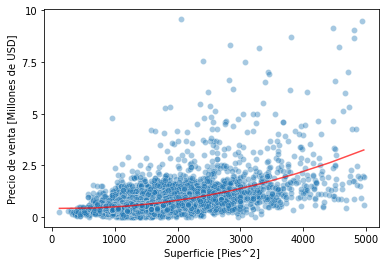

In [ ]:
import numpy as np
minX=df["gross.square.feet"].min()
maxX=df["gross.square.feet"].max()
# Tomamos valores entre el mínimo y el máximo con pasos de 10, agregamos los cuadrados y realizamos las predicciones
df_pred=pd.DataFrame({"gross.square.feet":np.linspace(minX,maxX,10)})
df_pred["gross.square.feet.sq"]=df_pred["gross.square.feet"]**2
df_pred["sale.price"]=mod.predict(df_pred)
# Graficamos los puntos y las predicciones se unen con líneas
sns.scatterplot(data=df,x="gross.square.feet",y="sale.price",alpha=0.4)
sns.lineplot(data=df_pred,x="gross.square.feet",y="sale.price",color="red",alpha=0.7)
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

## Regresión lineal múltiple

Notemos que en el código anterior, agregamos una nueva variable y se la pasamos como argumento al comando de regresión lineal, sin ningún tipo de reproche por parte de python. 

Esto lleva a pensar lo siguiente: Dado que el mercado inmobiliario es muy complejo, tiene sentido que el precio de un inmueble no dependa únicamente de su superficie. ¿Podemos agregar más variables? 

La respuesta es que sí, aunque siempre se asumirá que mantienen una estructura de suma. Por ejemplo, se pueden considerar las siguientes variables de la base:

* $\text{A}_i$: la antigüedad de cada inmueble (denominada `'age'` en la base de datos)

* $\text{L}_i$: la superficie de cada lote (denominada `'land.square.feet'` en la base de datos)

Considerando estas variables, se puede plantear el siguiente modelo para cada inmueble $i$:
$$ \text{P}_i\approx a+b\cdot \text{S}_i+c\cdot \text{S}^2_i + c\cdot \text{A}_i+d\cdot \text{A}^2_i +e\cdot \text{L}_i  $$

En el caso en el que se utiliza más de una variable predictiva, se dice que se aplica un modelo de regresión lineal **múltiple**.

## Estimación con Python

En python, seguimos los mismos pasos para obtener $a$, $b$, $c$, $d$ y $e$:

In [ ]:
# Elevamos la variable de antigüedad al cuadrado
df["age.sq"]=df["age"]**2
covs=["gross.square.feet","gross.square.feet.sq","age","land.square.feet","age.sq"];X=df[covs].copy()
resp=["sale.price"];y=df[resp].copy()
mod=LinearRegression();mod.fit(X,y)
# Mostramos los coeficientes
lis_coef=[[mod.intercept_],mod.coef_[0]]
print([float(c) for it in lis_coef for c in it])

[291449.36256165314, -51.77449224301617, 0.12656884296829352, 496.09206662828535, -4.815182216295759, 15.791970109957495]


Vemos además que aumenta aún más el valor de $R^2$

In [ ]:
print(mod.score(X,y))


0.29772598628729485


### Evaluación gráfica
A diferencia de los casos anteriores, ahora se agrega una complejidad. Como las variables agregadas no tienen necesariamente relación con la superficie del inmueble, puede ocurrir lo siguiente: para dos inmuebles de igual superficie, pero distinta antigüedad por ejemplo, los precios de venta estimados pueden diferir. 

Por lo tanto, ya no sirve sobreponer una única curva sobre los datos originales ya que las predicciones pueden no estar necesariamente conectadas entre sí. Además, tiene que estar la opción de agregar predicciones para **todas** las combinaciones posibles de las tres variables involucradas.

Por lo tanto, en vez de predecir algunos valores representativos, vamos a predecir **todos** los datos originales. Es decir, las variables que usamos para predecir las aplicamos en todas las instancias (sin repetición de combinaciones):

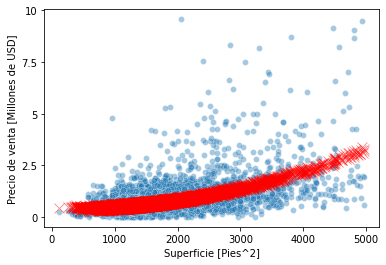

In [ ]:
df_pred=X.drop_duplicates().copy()
df_pred["sale.price"]=mod.predict(df_pred)
sns.scatterplot(data=df,x="gross.square.feet",y="sale.price",alpha=0.4)
sns.scatterplot(data=df_pred,x="gross.square.feet",y="sale.price",color="red",alpha=0.5,marker="x",s=100)
plt.xlabel("Superficie [Pies^2]")
plt.ylabel("Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

Notemos que en este caso, las estimaciones no están todas sobre la misma curva. Sobre todo en el medio, los puntos aparecen a distintas alturas para iguales valores de $x$. Justamente, esto se debe a que entran en juego las otras variables no disponibles en el gráfico (antigüedad y superficie del lote). Distintos valores de estas dos variables proveen distintas estimaciones y por lo tanto, tienen una "coordenada y" diferente.

Por otro lado, vale remarcar que esta variabilidad de las estimaciones también explica el incremento de $R^2$ con este modelo, ya que al tener más factores en cuenta, las estimaciones se pueden adaptar más a la heterogeneidad de los datos.

### Interpretación de los coeficientes

AGREGAR

## Variables categóricas

Hay un factor que no fue considerado en el modelo anterior que es de suma importancia en el mercado inmobiliario: la **ubicación** del inmueble.

Respecto a la ubicación del inmueble, la base tiene las siguientes variables:

* $\text{D}_i$: el distrito o comuna de cada inmueble (denominada `'borough'` en la base de datos)

* $\text{B}_i$: el barrio del inmueble (denominada `'neighborhood'` en la base de datos)

### Gráfico exploratorio

Primero inspeccionemos cómo son los precios de venta respecto de las superficies en cada distrito:

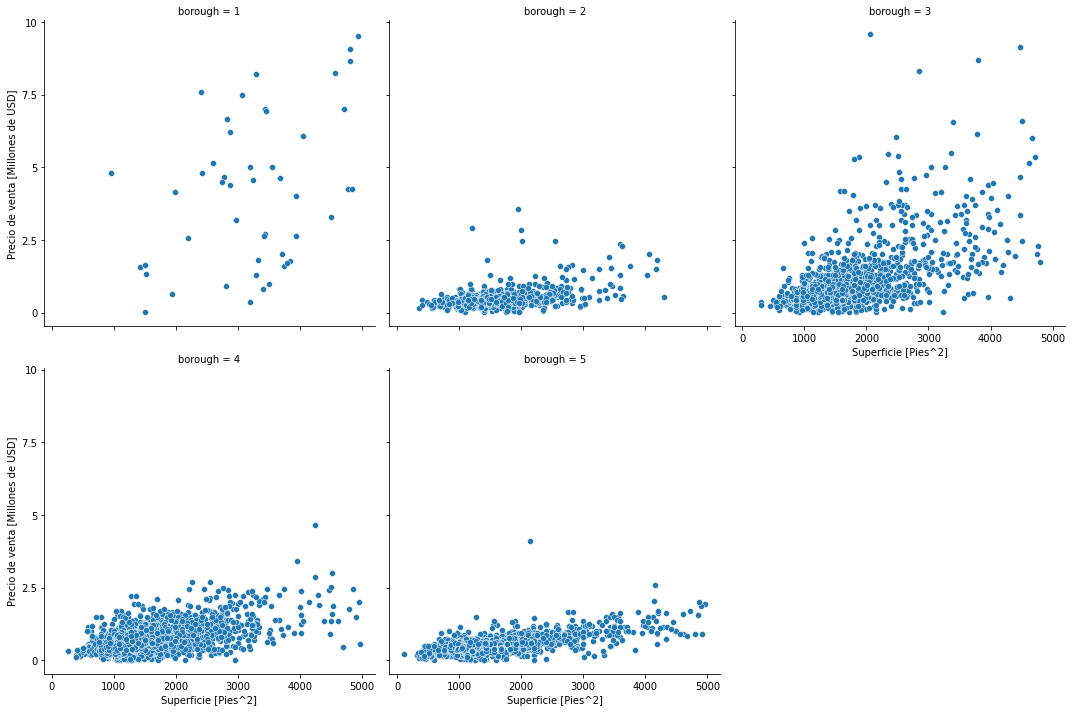

In [ ]:
g=sns.relplot(x="gross.square.feet", y="sale.price", data=df, kind="scatter",
col="borough",col_wrap=3)
g.set(xlabel="Superficie [Pies^2]",ylabel="Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

Podemos ver que la estructura heterogénea de los datos originales se vuelve más homogénea cuando se individualiza cada distrito. Por lo que se ve en el gráfico, tendría sentido plantear un modelo que considere una recta distinta por cada distrito.

### Regresión lineal con variables categóricas

Como dijimos anteriormente, una regresión lineal que considere (por ejemplo) la variable del distrito y la superficie, sería establecer la siguiente aproximación:
$$\text{P}_i \approx a+b\cdot \text{S}_i + c\cdot \text{D}_i $$

Sin embargo, surgen los siguientes inconvenientes:
* Al ser una variable categórica, ¿Cómo se "suma un distrito" numéricamente? 
* Para "sumar" los valores de la variable "distrito", se puede establecer un código numérico para cada distrito (Distrito 1, Distrito 2, etc.). Sin embargo, este orden establecido es completamente arbitrario, podrían intercambiarse los valores (por ejemplo, puede cambiarse el Distrito 1, por el Distrito 2 y viceversa) y alterar todas las sumas que quisimos hacer previamente.

Respecto a este último inconveniente, la variable `'borough'` ya tiene un código similar, pero presenta la misma arbitrariedad que cualquier código numérico:

In [ ]:
# Permuto los datos porque aparecen ordenados por barrio, la permutación permite ver distintos barrios y distritos en las primeras filas
df=df.sample(frac=1,random_state=1).reset_index()

In [ ]:
print("Base original:")
print(df[["borough","neighborhood"]].head())
# Restando 1, podría llamar al Distrito 4 como 3, al 2 como 1, etc. 
# Eso alteraría los valores que se utilizan en la suma.
df["borough"]=df["borough"]-1
print("Base con nuevos códigos:")
print(df[["borough","neighborhood"]].head())
# Vuelvo al código original volviendo a sumar 1
df["borough"]=df["borough"]+1

Base original:
   borough         neighborhood
0        5          TOTTENVILLE
1        5      MARINERS HARBOR
2        4        RICHMOND HILL
3        2            RIVERDALE
4        2  MORRISANIA/LONGWOOD
Base con nuevos códigos:
   borough         neighborhood
0        4          TOTTENVILLE
1        4      MARINERS HARBOR
2        3        RICHMOND HILL
3        1            RIVERDALE
4        1  MORRISANIA/LONGWOOD



Por lo tanto, hay que tener cierto cuidado a la hora de incluir variables categóricas en un modelo de regresión.

### Variables dummies

Para utilizar un criterio coherente, se crea una columna por cada nivel de la variable categórica que se quiere utilizar. Estas columnas agregadas se llaman "variables dummies" y sólo toman dos valores: 1 y 0. En python, se genera con el método "get_dummies".




In [ ]:
# Creamos una nueva base df1 con las variables dummies para la variable "borough"
df1=pd.get_dummies(df,columns=["borough"])
# Mostramos los nombres de las columnas de la base original y en la base nueva
print("Columnas base original:")
print(df.columns.values)
print("Columnas base nueva:")
print(df1.columns.values)

Columnas base original:
['index' 'time.index' 'borough' 'neighborhood' 'building.class.category'
 'zip.code' 'residential.units' 'commercial.units' 'total.units'
 'land.square.feet' 'gross.square.feet' 'year.built' 'sale.price'
 'sale.date' 'sale.year' 'age' 'gross.square.feet.sq' 'age.sq']
Columnas base nueva:
['index' 'time.index' 'neighborhood' 'building.class.category' 'zip.code'
 'residential.units' 'commercial.units' 'total.units' 'land.square.feet'
 'gross.square.feet' 'year.built' 'sale.price' 'sale.date' 'sale.year'
 'age' 'gross.square.feet.sq' 'age.sq' 'borough_1' 'borough_2' 'borough_3'
 'borough_4' 'borough_5']


Se ve que en la nueva base desaparece la variable `'borough'` y aparecen 5 nuevas variables: `'borough_1',
 'borough_2', 'borough_3', 'borough_4', 'borough_5'`. Es decir, se eliminó una columna pero se agregaron otras 5.

Veamos cómo se genera esta transformación y cómo se codifica la información:

In [ ]:
print("Base original:")
print(df[["borough","neighborhood"]].head())
covsB=[dV for dV in df1.columns.values if dV.startswith("borough_")]
print("Base con dummies:") 
print(df1[covsB].head())

Base original:
   borough         neighborhood
0        5          TOTTENVILLE
1        5      MARINERS HARBOR
2        4        RICHMOND HILL
3        2            RIVERDALE
4        2  MORRISANIA/LONGWOOD
Base con dummies:
   borough_1  borough_2  borough_3  borough_4  borough_5
0          0          0          0          0          1
1          0          0          0          0          1
2          0          0          0          1          0
3          0          1          0          0          0
4          0          1          0          0          0


Se puede ver que los inmuebles que pertenecen al distrito 5, tienen en la columna `'borough_5'` un 1 y un cero en las otras columnas. Del mismo modo, el inmueble que pertenece al distrito 4, tiene un 1 en la columna `'borough_4'` y un cero en las otras columnas. Lo mismo sucede con las observaciones de otro distrito. Es decir, se utilizan las columnas para saber a qué categoría pertenece.

Notar además, que todas las categorías presentan el mismo valor y por lo tanto, no se generan diferencias numéricas entre las mismas.

En general, se suele desechar la primer columna dummy. Esto se debe a que la información de esta columna se puede inferir a partir de las otras. En Python se realiza esto agregando el argumento `drop_first=True`:

In [ ]:
# Creamos una nueva base df1 con las variables dummies para la variable "borough"
df1=pd.get_dummies(df,columns=["borough"],drop_first=True)
print("Columnas base original:")
print(df.columns.values)
print("Columnas base nueva:")
print(df1.columns.values)
print("Base original:")
print(df[["borough","neighborhood"]].head())
covsB=[dV for dV in df1.columns.values if dV.startswith("borough_")]
print("Base con dummies:") 
print(df1[covsB].head())

Columnas base original:
['index' 'time.index' 'borough' 'neighborhood' 'building.class.category'
 'zip.code' 'residential.units' 'commercial.units' 'total.units'
 'land.square.feet' 'gross.square.feet' 'year.built' 'sale.price'
 'sale.date' 'sale.year' 'age' 'gross.square.feet.sq' 'age.sq']
Columnas base nueva:
['index' 'time.index' 'neighborhood' 'building.class.category' 'zip.code'
 'residential.units' 'commercial.units' 'total.units' 'land.square.feet'
 'gross.square.feet' 'year.built' 'sale.price' 'sale.date' 'sale.year'
 'age' 'gross.square.feet.sq' 'age.sq' 'borough_2' 'borough_3' 'borough_4'
 'borough_5']
Base original:
   borough         neighborhood
0        5          TOTTENVILLE
1        5      MARINERS HARBOR
2        4        RICHMOND HILL
3        2            RIVERDALE
4        2  MORRISANIA/LONGWOOD
Base con dummies:
   borough_2  borough_3  borough_4  borough_5
0          0          0          0          1
1          0          0          0          1
2          0     

Vemos que las columnas agregadas son  'borough_2', 'borough_3', 'borough_4', 'borough_5'. Es decir, se agregaron sólo 4 columnas. Sin embargo, la información sobre inmuebles del distrito 1 sigue estando, ya que si estas cuatro variables son cero, se puede concluir que dicha variable es del distrito 1:

In [ ]:
print("Observaciones del distrito 1:")
print(df.loc[df["borough"]==1,["borough","neighborhood"]].head(2))
print(df1.loc[df["borough"]==1,covsB].head(2))
print("Observaciones de otro distrito:")
print(df.loc[df["borough"]==3,["borough","neighborhood"]].head(2))
print(df1.loc[df["borough"]==3,covsB].head(2))


Observaciones del distrito 1:
     borough    neighborhood
511        1    MIDTOWN EAST
662        1  HARLEM-CENTRAL
     borough_2  borough_3  borough_4  borough_5
511          0          0          0          0
662          0          0          0          0
Observaciones de otro distrito:
    borough  neighborhood
16        3  CLINTON HILL
17        3  CLINTON HILL
    borough_2  borough_3  borough_4  borough_5
16          0          1          0          0
17          0          1          0          0


Por lo tanto, llamando a estas cuatro variables $\text{D}_{2,i},\text{D}_{3,i},\text{D}_{4,i}$ y $\text{D}_{5,i}$, se puede reformular el modelo anterior del siguiente modo:
$$\text{P}_i \approx a+b\cdot \text{S}_i + c\cdot \text{D}_{2,i}+ d⋅ \text{D}_{3,i} + e⋅ \text{D}_{4,i} + f\cdot \text{D}_{5,i} $$
sin ningún problema en lo que concierne a la aritmética. Es decir, se sabe qué sumar (0 o 1) y no hay ninguna arbitrariedad.

De todas formas, según el gráfico exploratorio tenía sentido considerar una recta por cada distrito. Por lo tanto, deberían haber un intercept (notado con $a$) y una pendiente (notado con $b$) para cada distrito (por ejemplo, $a_1$ y $b_1$ representan la ordenada y la pendiente de la recta correspondiente al distrito 1), dando lugar a 10 constantes desconocidas que debemos estimar. Es decir:
$$ \text{P}_i \approx 
a_1 +b_1  \cdot \text{S}_i \text{ (si el inmueble es del Distrito 1)} $$
$$ \text{P}_i \approx 
a_2 +b_2  \cdot \text{S}_i \text{ (si el inmueble es del Distrito 2)} $$
$$ \text{P}_i \approx 
a_3 +b_3  \cdot \text{S}_i \text{ (si el inmueble es del Distrito 3)} $$
$$ \text{P}_i \approx 
a_4 +b_4  \cdot \text{S}_i \text{ (si el inmueble es del Distrito 4)} $$
$$ \text{P}_i \approx 
a_5 +b_5  \cdot \text{S}_i \text{ (si el inmueble es del Distrito 5)} $$


### Estimación con Python

Para generar estas rectas específicas por distrito, debemos basarnos en las variables dummies, generando otras columnas multiplicando por la variable de superficie.

In [ ]:
df1=pd.get_dummies(df,columns=["borough"])
# Los nombres de las variables dummies
covsB=[dV for dV in df1.columns.values if dV.startswith("borough_")]
# Los nombres de las nuevas variables de superficie multiplicadas por las variables dummies
covsBgsf=[dV+"_gsf" for dV in covsB]
for i in range(5):
  df1[covsBgsf[i]]=df1[covsB[i]]*df1["gross.square.feet"]

Vemos que estas nuevas columnas guardan la información por distrito:

In [ ]:
covsB=[dV for dV in df1.columns.values if dV.startswith("borough_")]
print("Datos originales de superficie:")
print(df[["borough","gross.square.feet"]].head())
print("Datos nuevos de superficie:")
print(df1[covsB].head())

Datos originales de superficie:
   borough  gross.square.feet
0        5               2600
1        5                935
2        4                975
3        2               2000
4        2               1152
Datos nuevos de superficie:
   borough_1  borough_2  borough_3  borough_4  borough_5  borough_1_gsf  \
0          0          0          0          0          1              0   
1          0          0          0          0          1              0   
2          0          0          0          1          0              0   
3          0          1          0          0          0              0   
4          0          1          0          0          0              0   

   borough_2_gsf  borough_3_gsf  borough_4_gsf  borough_5_gsf  
0              0              0              0           2600  
1              0              0              0            935  
2              0              0            975              0  
3           2000              0              0       

Notar que para los inmuebles del distrito 5, se obtienen valores distinto de cero en las columnas correspondientes al distrito 5. Más aún, la variable `'borough_5_gsf'` contiene los valores correspondientes a la superficie de cada inmueble de dicho distrito. Lo mismo ocurre con el resto de los distritos.

Con estas nuevas variables, podemos generar el modelo deseado:

In [ ]:
X=df1[covsB].copy()
y=df1["sale.price"].copy()
mod=LinearRegression(fit_intercept=False)
mod.fit(X,y)
print(mod.score(X,y))

0.4718757976364857


Aunque no llega a valores muy altos, vemos que el $R^2$ aumenta considerablemente respecto de los modelos anteriores. Esto se da porque las predicciones se adaptan mejor a la heterogeneidad de los datos. Para verlo gráficamente, primero agregamos las predicciones como filas de la base para que sea más fácil ordenarlos por distrito.

In [ ]:
# Agrego una columna que describa el distrito para poder luego separar los gráficos según esta variable.
df1["borough"]=df["borough"].copy()
# De todas las variables de la base, sólo se requieren las siguientes para realizar las predicciones
vars=['gross.square.feet','borough_1','borough_2', 'borough_3', 'borough_4', 'borough_5',
       'borough_1_gsf', 'borough_2_gsf', 'borough_3_gsf', 'borough_4_gsf','borough_5_gsf', 'borough','sale.price']
# En la base nueva sólo me quedo con las variables seleccionadas
df1=df1[vars]
# La cantidad de variables generadas
nVars=len(vars)
# Agrego una columna para identificar a los datos observados
df1["clase"]=["Reales"]*df1.shape[0]
# Considero un vector entre el máximo y el mínimo de las superficies para graficar las predicciones
minX=df1["gross.square.feet"].min()
maxX=df1["gross.square.feet"].max()
xS=np.linspace(minX,maxX,100)
nS=len(xS)
# La variable "i" recorre los distritos
for i in range(1,6):
  # Inicio una base con la variable de superficie
  dfAux=pd.DataFrame({"gross.square.feet":xS})
  # La variable "j" recorre las variables correspondientes a los distritos
  for j in range(1,nVars-2):
    varAux=vars[j]
    # Si el número "i" aparece en la variable, hay un valor para imputar
    if str(i) in varAux:
      if "gsf" in varAux:
      # Si la variable tiene la combinación "gsf", es porque representa los 
      # metros cuadrados de un inmueble de el distrito en cuestión
        dfAux[varAux]=dfAux["gross.square.feet"]
      else:
      # Si la variable No tiene la combinación "gsf", sólo debe imputarse un valor 1
        dfAux[varAux]=[1]*nS
    else:
      # Si la variable actual no corresponde al distrito "i", se agrega un 0
      dfAux[varAux]=[0]*nS
  # Agrego las variables que permiten igualar la base de predicciones con la base original
  dfAux["borough"]=i
  dfAux["sale.price"]=mod.predict(dfAux[covsB])
  dfAux["clase"]=["Estimados"]*nS
  # Agrego debajo de la base actual, la base con las estimaciones del distrito "i"
  df1=pd.concat([df1,dfAux])

<ipython-input-33-24a05d4020cc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clase"]=["Reales"]*df1.shape[0]


In [ ]:
print(df1.head())
print(df1.tail())
print(df1.describe())

   gross.square.feet  borough_1  borough_2  borough_3  borough_4  borough_5  \
0             2600.0          0          0          0          0          1   
1              935.0          0          0          0          0          1   
2              975.0          0          0          0          1          0   
3             2000.0          0          1          0          0          0   
4             1152.0          0          1          0          0          0   

   borough_1_gsf  borough_2_gsf  borough_3_gsf  borough_4_gsf  borough_5_gsf  \
0            0.0            0.0            0.0            0.0         2600.0   
1            0.0            0.0            0.0            0.0          935.0   
2            0.0            0.0            0.0          975.0            0.0   
3            0.0         2000.0            0.0            0.0            0.0   
4            0.0         1152.0            0.0            0.0            0.0   

   borough  sale.price   clase  
0        5 

Con esta base podemos ver las estimaciones por distrito. Se ve cómo fueron adaptadas distintas rectas para cada distrito.

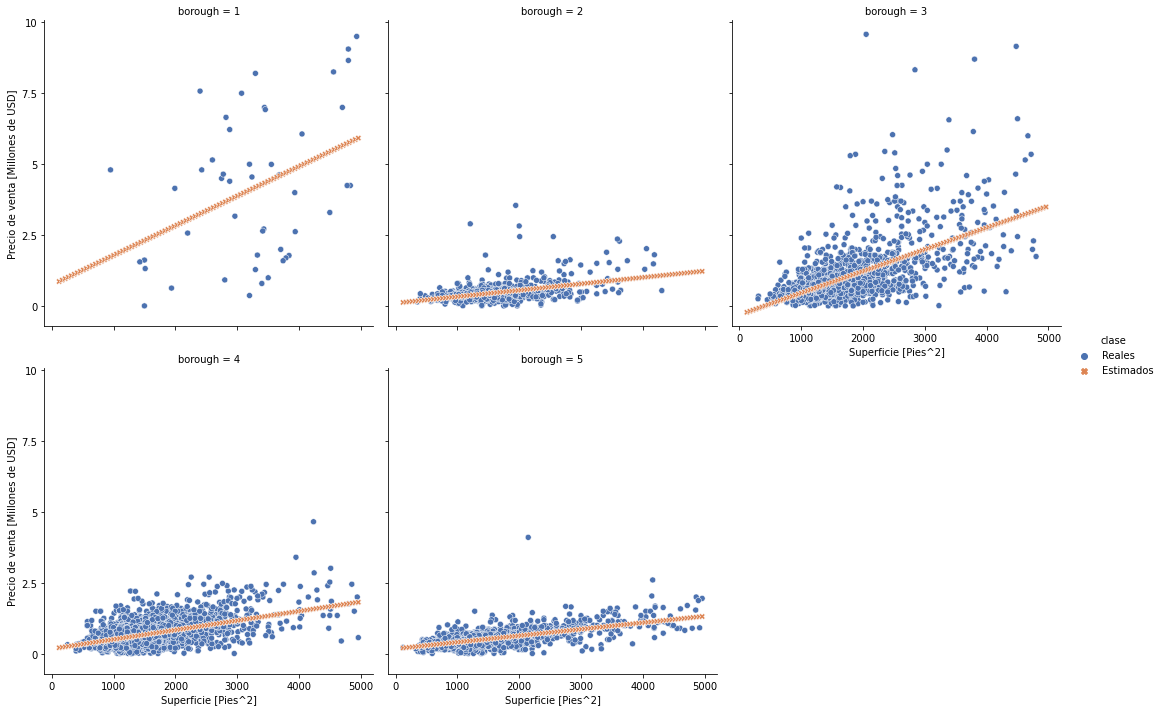

In [ ]:
g=sns.relplot(x="gross.square.feet", y="sale.price", data=df1, kind="scatter",
col="borough",col_wrap=3,hue="clase",style="clase",markers={"Reales":"o","Estimados":"X"},palette="deep")
g.set(xlabel="Superficie [Pies^2]",ylabel="Precio de venta [Millones de USD]")
plt.yticks(ticks=[0,0.25e7,0.5e7,0.75e7,1e7],labels=[0,2.5,5,7.5,10])
plt.show()

## Overfitting y capacidad predictiva

Como se habló previamente, una vez que se estiman los coeficientes, uno de los objetivos de estos modelos es intentar predecir el precio de venta de nuevos inmuebles a partir de los inmuebles ya observados.

Pero esas predicciones dependen de dos cuestiones:
* Que el nuevo inmueble tenga similitud con los datos utilizados para la estimación.
* La heterogeneidad de los datos utilizados para la estimación. Mientras más casos estén contemplados, mejores serán los aprendizajes para abordar nuevas observaciones.

Por ejemplo, se ve que los distritos 1 y 5 tienen relaciones muy distintas entre la superficie y su precio de venta. Entonces, si utilizamos los datos del distrito 5 para estimar los valores de $a$ y $b$, esos valores no serán representativos de los correspondientes al distrito 1.

Veamos esto en el siguiente ejemplo:

In [ ]:
# Base restringida al distrito 1
df_b1=df.loc[df["borough"]==1].copy()
print(df_b1.head())
# Base restringida al distrito 5
df_b5=df.loc[df["borough"]==5].copy()
print(df_b5.head())

      index  time.index  borough             neighborhood  \
511    3207         231        1             MIDTOWN EAST   
662    3191         130        1           HARLEM-CENTRAL   
1009   3195         309        1           HARLEM-CENTRAL   
1014   3211          32        1                  TRIBECA   
1145   3216         358        1  UPPER EAST SIDE (59-79)   

      building.class.category  zip.code  residential.units  commercial.units  \
511   01 ONE FAMILY DWELLINGS     10022                  1                 0   
662   01 ONE FAMILY DWELLINGS     10027                  1                 0   
1009  01 ONE FAMILY DWELLINGS     10027                  1                 0   
1014  01 ONE FAMILY DWELLINGS     10013                  1                 1   
1145  01 ONE FAMILY DWELLINGS     10021                  1                 0   

      total.units  land.square.feet  gross.square.feet  year.built  \
511             1               851               4703        1899   
662         

Supongamos que utilizamos los datos del distrito 5 para estimar los coeficientes de la recta.

In [ ]:
X_train=df_b5[["gross.square.feet"]].copy()
y_train=df_b5["sale.price"].copy()
mod=LinearRegression()
mod.fit(X_train,y_train)
print([mod.intercept_,float(mod.coef_)])
print(mod.score(X_train,y_train))

[175724.46669097984, 229.19300465977642]
0.3787195552348216


Vemos además que la recta se ajusta mucho mejor a los datos cuando son específicos al distrito 5, respecto de la base total:

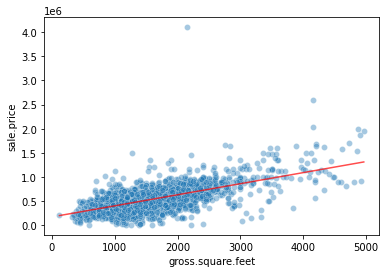

In [ ]:
minX=float(X_train.min())
maxX=float(X_train.max())
df_pred=pd.DataFrame({"gross.square.feet":[minX,maxX]})
df_pred["sale.price"]=mod.predict(df_pred)
sns.scatterplot(x="gross.square.feet",y="sale.price",data=df_b5,alpha=0.4)
sns.lineplot(x="gross.square.feet",y="sale.price",data=df_pred,color="red",alpha=0.7)
plt.show()

Sin embargo, veamos qué sucede cuando aplicamos estas predicciones a los inmuebles del distrito 1:

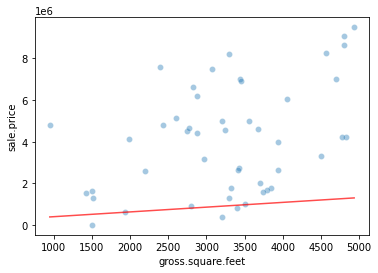

-1.5071647243579966


In [ ]:
X_test=df_b1[["gross.square.feet"]].copy()
y_test=df_b1[["sale.price"]].copy()
y_pred=mod.predict(X_test)
df_pred=X_test.copy()
df_pred["sale.price"]=y_pred
sns.scatterplot(x="gross.square.feet",y="sale.price",data=df_b1,alpha=0.4)
sns.lineplot(x="gross.square.feet",y="sale.price",data=df_pred,color="red",alpha=0.7)
plt.show()

Recordemos que el $R^2$ se utilizaba para medir cuán bien un cierto modelo representa a los datos. Se puede utilizar la misma estrategia para evaluar la capacidad predictiva de un modelo, para ver cómo se ajusta a nuevas observaciones. En este caso, el valor de $R^2$ da resultado negativo.

In [ ]:
print(mod.score(X_test,y_test))

-1.5071647243579966


Esto parece contradecir lo dicho anteriormente sobre los valores que puede tomar esta medida. Sin embargo, a veces se utiliza una corrección para calcular el $R^2$ que en casos de rectas muy poco representativas, puede dar negativo (más aún cuando se utilizan pocas observaciones, como es este caso).

Ver https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean

### Overfitting

Este es un claro ejemplo del fenómeno llamado "overfitting", en el que busca explicar con tanta precisión un conjunto de datos, que falla al predecir los resultados de datos nuevos. Por lo tanto, todo modelo debe buscar un equilibrio entre ambas capacidades:
* Un modelo con buenas capacidades explicativas permite representar los datos que se utilizaron en la estimación.
* Un modelo con buenas capacidades predictivas permite estimar correctamente las respuestas correspondientes a observaciones nuevas.

En este caso, para evitar el overfitting, la base inicial debe contener datos de todos los distritos. 

Más en general, se debe tener bien claro qué características tienen las observaciones utilizadas para estimar, para saber en qué casos se pueden extrapolar dichos resultados.


## Transformaciones de variables

En los precios de venta de esta base hay una característica muy frecuente en datos correspondientes a valores monetarios: son muy asimétricas y hay unas pocas observaciones que están muy alejadas del resto de la población considerada. 

En casos como estos se puede aplicar una transformación a los datos que achique estas diferencias, con el objetivo de lograr mejores cálculos y reducir el impacto de los valores extremos.

Una de las transformaciones que se puede realizar es una función logarítmica. Vemos en el siguiente gráfico que al considerar la variable transformada no sólo se mitigan los valores altos (aunque genera mayor dispersión y unos valores muy bajos), sino que los datos se disponen gráficamente en una estructura más cercana a una recta:

   index  time.index  borough         neighborhood  building.class.category  \
0  12157         278        5          TOTTENVILLE  01 ONE FAMILY DWELLINGS   
1  10822         318        5      MARINERS HARBOR  01 ONE FAMILY DWELLINGS   
2   7386         277        4        RICHMOND HILL  01 ONE FAMILY DWELLINGS   
3    663         308        2            RIVERDALE  01 ONE FAMILY DWELLINGS   
4    490          29        2  MORRISANIA/LONGWOOD  01 ONE FAMILY DWELLINGS   

   zip.code  residential.units  commercial.units  total.units  \
0     10307                  1                 0            1   
1     10303                  1                 0            1   
2     11419                  1                 0            1   
3     10471                  1                 0            1   
4     10456                  1                 0            1   

   land.square.feet  gross.square.feet  year.built  sale.price   sale.date  \
0              4720               2600        1994    86

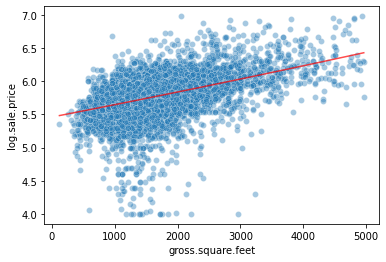

In [ ]:
df["log.sale.price"]=np.log10(df["sale.price"])
X=df[["gross.square.feet"].copy()
y=df[["log.sale.price"]].copy()
print(df.head())
mod=LinearRegression()
mod.fit(X,y)
minX=float(X.min())
maxX=float(X.max())
df_pred=pd.DataFrame({"gross.square.feet":np.linspace(minX,maxX)})
df_pred["gross.square.feet.sq"]=df_pred["gross.square.feet"]**2
df_pred["log.sale.price"]=mod.predict(df_pred)
print(df_pred.head())
sns.scatterplot(x="gross.square.feet",y="log.sale.price",data=df,alpha=0.4)
sns.lineplot(x="gross.square.feet",y="log.sale.price",data=df_pred,color="red",alpha=0.7)
plt.show()

Se puede ver aún más claro dividiendo por distrito. Para eso, reproduciremos el modelo anterior utilizando las variables dummies:

In [ ]:
df1=pd.get_dummies(df,columns=["borough"])
# Los nombres de las variables dummies
covsB=[dV for dV in df1.columns.values if dV.startswith("borough_")]
# Los nombres de las nuevas variables de superficie multiplicadas por las variables dummies
covsBgsf=[dV+"_gsf" for dV in covsB]
for i in range(5):
  df1[covsBgsf[i]]=df1[covsB[i]]*df1["gross.square.feet"]
df1["age.sq"]=df1["age"]**2
covsB.extend(["gross.square.feet","gross.square.feet.sq","age","land.square.feet","age.sq"])
X=df1[covsB].copy()
y=df1["log.sale.price"].copy()
mod=LinearRegression(fit_intercept=False)
mod.fit(X,y)
print(mod.score(X,y))

0.29716833397805


In [ ]:
# Elevamos la variable de antigüedad al cuadrado
df["age.sq"]=df["age"]**2
covs=["gross.square.feet","gross.square.feet.sq","age","land.square.feet","age.sq"];X=df[covs].copy()
resp=["log.sale.price"];y=df[resp].copy()
mod=LinearRegression();mod.fit(X,y)
# Mostramos los coeficientes
lis_coef=[[mod.intercept_],mod.coef_[0]]
print([float(c) for it in lis_coef for c in it])
print(mod.score(X,y))

[5.331745614361578, 0.00018919160852861713, -5.159858560826037e-10, 0.0026598976153680803, 9.141265005791548e-06, -1.5516661831867388e-05]
0.20773103978267238


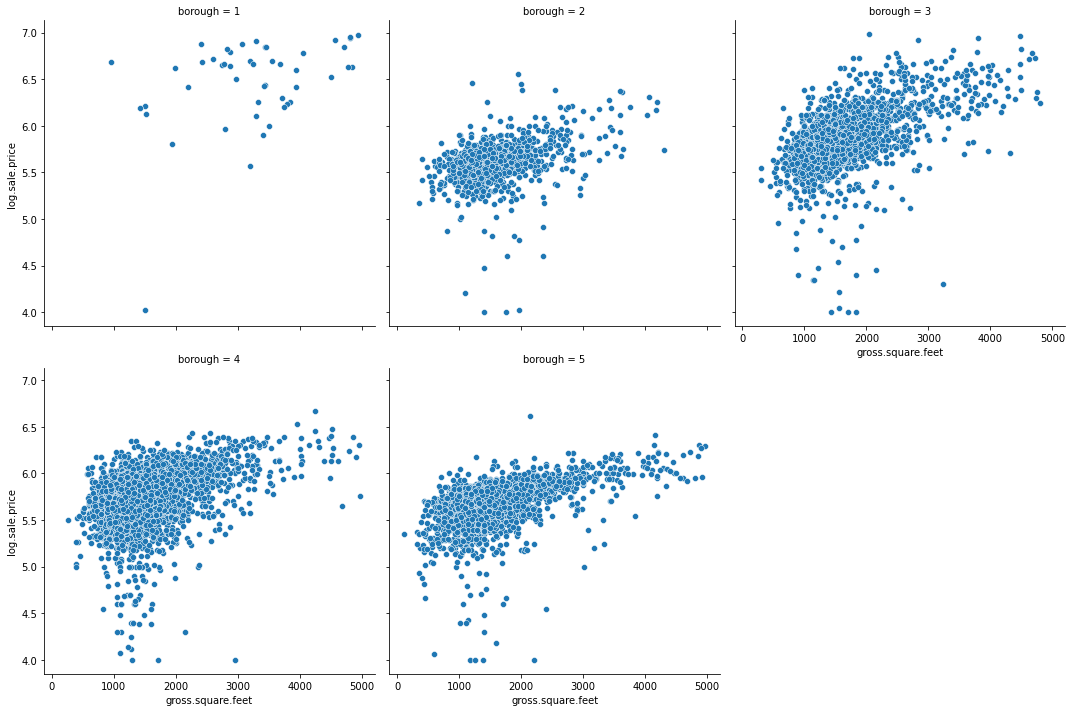

In [ ]:
g=sns.relplot(x="gross.square.feet", y="log.sale.price", data=df, kind="scatter",
col="borough",col_wrap=3)
plt.show()